In [118]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [130]:
dataset = 'adult'
tg_path = f'results_{dataset}_trial_5.json'

with open(tg_path,'r') as f:
    summary = json.load(f)
    
print(summary)
nodebias, laftr, cfair, cfair_EO = [], [], [], []
methods = ['fair','nodebias', 'laftr', 'cfair','cfair_EO', 'cfair_ours']
lamb = [0.1, 1.0, 10.0, 100.0, 1000.0] if dataset == 'adult' else [0.1, 1.0, 10.0]
metrics = ['ErrGap', 'EO', 'DemoP', 'JointErr']

{'nodebias_lamb=0.1': {'ErrGap': [0.11919, 0.00372], 'JointErr': [0.29709, 0.00418], 'EO': [0.10715, 0.02473], 'DemoP': [0.19219, 0.01979], 'Lamb': [0.1, 0.0]}, 'nodebias_lamb=1.0': {'ErrGap': [0.11986, 0.00285], 'JointErr': [0.29938, 0.00521], 'EO': [0.10147, 0.00752], 'DemoP': [0.19796, 0.00907], 'Lamb': [1.0, 0.0]}, 'nodebias_lamb=10.0': {'ErrGap': [0.12271, 0.00372], 'JointErr': [0.29263, 0.00215], 'EO': [0.10552, 0.01144], 'DemoP': [0.19542, 0.00999], 'Lamb': [10.0, 0.0]}, 'nodebias_lamb=100.0': {'ErrGap': [0.12116, 0.00238], 'JointErr': [0.29425, 0.00414], 'EO': [0.09585, 0.01339], 'DemoP': [0.19136, 0.01659], 'Lamb': [100.0, 0.0]}, 'nodebias_lamb=1000.0': {'ErrGap': [0.12264, 0.00192], 'JointErr': [0.29565, 0.00377], 'EO': [0.112, 0.01872], 'DemoP': [0.19416, 0.0121], 'Lamb': [1000.0, 0.0]}, 'laftr_lamb=0.1': {'ErrGap': [0.11927, 0.00197], 'JointErr': [0.29252, 0.00509], 'EO': [0.08719, 0.01621], 'DemoP': [0.18026, 0.02073], 'Lamb': [0.1, 0.0]}, 'laftr_lamb=1.0': {'ErrGap': [0.1

In [131]:
tg_path = f'results_{dataset}_trial_5_fair.json'

with open(tg_path,'r') as f:
    fair_summary = json.load(f)

for m in fair_summary.keys():
    summary[m] = {}
    for metric in metrics:
        summary[m][metric] = fair_summary[m][metric]
    summary[m]['Lamb'] = fair_summary[m]['Lamb']

print(fair_summary)
print(summary['fair_lamb=0.1'])
    

{'fair_lamb=0.1': {'ErrGap': [0.11757, 0.00473], 'JointErr': [0.29441, 0.00483], 'EO': [0.08143, 0.01571], 'DemoP': [0.17231, 0.01652], 'Lamb': [0.1, 0.0]}, 'fair_lamb=1.0': {'ErrGap': [0.10202, 0.00358], 'JointErr': [0.294, 0.00276], 'EO': [0.06719, 0.02118], 'DemoP': [0.11236, 0.00805], 'Lamb': [1.0, 0.0]}, 'fair_lamb=10.0': {'ErrGap': [0.08546, 0.01519], 'JointErr': [0.32132, 0.01196], 'EO': [0.25336, 0.0352], 'DemoP': [0.02836, 0.01433], 'Lamb': [10.0, 0.0]}, 'fair_lamb=100.0': {'ErrGap': [0.10202, 0.0171], 'JointErr': [0.30776, 0.02981], 'EO': [0.21235, 0.0817], 'DemoP': [0.08808, 0.09367], 'Lamb': [100.0, 0.0]}, 'fair_lamb=1000.0': {'ErrGap': [0.12417, 0.00499], 'JointErr': [0.32372, 0.01237], 'EO': [0.08354, 0.0457], 'DemoP': [0.08866, 0.03703], 'Lamb': [1000.0, 0.0]}}
{'ErrGap': [0.11757, 0.00473], 'EO': [0.08143, 0.01571], 'DemoP': [0.17231, 0.01652], 'JointErr': [0.29441, 0.00483], 'Lamb': [0.1, 0.0]}


In [132]:
for l in lamb:
    for idx in range(len(lamb)):
        m = f'nodebias_lamb={l}'
        for metric in summary[m].keys():
            if metric=='Lamb':
                continue
            summary[m][metric][0] = summary[f'nodebias_lamb=0.1'][metric][0]

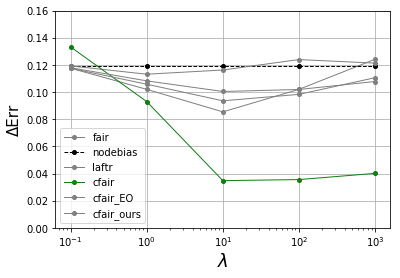

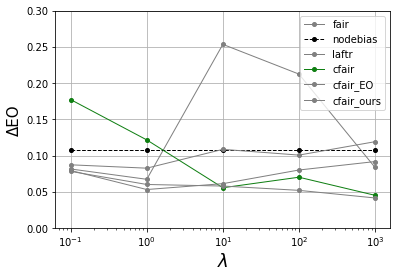

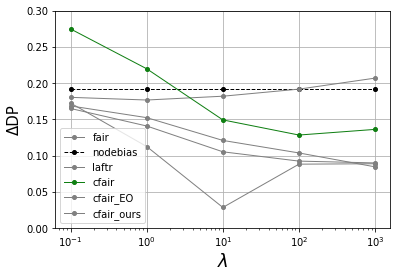

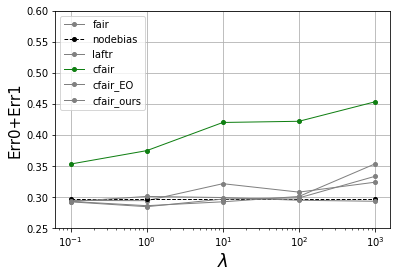

In [134]:
for metric in metrics:
    fig = plt.plot()
    plt.xscale('log')
    plt.ylabel(metric, fontsize=15)
    plt.xlabel(r'$\lambda$', fontsize=18)
    plt.grid(True)
    results = {}
    
    if dataset=='adult':
        if metric == 'ErrGap':
            y_min = 0.00
            y_max = 0.16
        elif metric == 'JointErr':
            y_min = 0.25
            y_max = 0.60
        elif metric == 'EO':
            y_min = 0.00
            y_max = 0.30
        elif metric == 'DemoP':
            y_min = 0.00
            y_max = 0.30
    
    elif dataset=='compas':
        if metric == 'ErrGap':
            y_min = 0.00
            y_max = 0.08
        elif metric == 'JointErr':
            y_min = 0.60
            y_max = 0.75
        elif metric == 'EO':
            y_min = 0.00
            y_max = 0.35
        elif metric == 'DemoP':
            y_min = 0.00
            y_max = 0.32
    
    plt.ylim([y_min, y_max])
    
    for m in methods:
        results[m] = [0 for _ in range(len(lamb))]
    #print(results[m])

        # add fair
    results['fair'] = [0 for _ in range(len(lamb))]
    #print(results)
        
    for key in summary.keys():
        lamb_value = summary[key]['Lamb'][0]
        method = key.split('_lamb')[0] 
        idx = round(math.log(lamb_value, 10)+1)
        #print(f'idx: {idx}')
        results[method][idx] = summary[key][metric][0]

    for method in methods:
        l_style = '--' if method == 'nodebias' else '-'
        if method == 'nodebias':
            colorStr = "#000000"
        elif method == 'cfair':
            colorStr = "#0F7F12"
        else:
            colorStr = "#808080"  
#         if method == 'nodebias':
#             colorStr = "#000000"
#         elif method == 'cfair':
#             colorStr = "#0F7F12"
#         elif method == 'cfair_EO':
#             colorStr = "#0b24fb"
#         elif method == "laftr":
#             colorStr = "#bd1bbd"
#         elif method == "fair":
#             colorStr = "#fc0d1b"  
        plt.plot(lamb, results[method], label=method, linestyle=l_style, color = colorStr, marker='o', linewidth=1, markersize=4)
        
        #print(metric)
        if metric == 'ErrGap':
            ylabel = "ΔErr"
        elif metric == 'EO':
            ylabel = "ΔEO"
        elif metric == 'DemoP':
            ylabel = "ΔDP"
        elif metric == 'JointErr':
            ylabel = "Err0+Err1"
        plt.ylabel(ylabel)
        
    plt.legend()
    plt.savefig(f'{dataset}_results_{metric}_highlight.png')
    plt.show()

In [36]:
print(summary['nodebias_lamb=1000.0'])

{'ErrGap': [0.11919, 0.00192], 'JointErr': [0.29709, 0.00377], 'EO': [0.10715, 0.01872], 'DemoP': [0.19219, 0.0121], 'Lamb': [1000.0, 0.0]}
